In [1]:

import os
import sys
import torch.backends.cudnn as cudnn
import yaml
from utils import AttrDict
import pandas as pd
import numpy as np
from train import train

In [2]:
cudnn.benchmark = True
cudnn.deterministic = False

In [3]:
def get_config(file_path):
    with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)
    opt = AttrDict(opt)
    if opt.lang_char == 'None':
        characters = ''
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], data, 'labels.csv')
            df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
    else:
        opt.character = opt.number + opt.symbol + opt.lang_char
    os.makedirs(f'./saved_models/{opt.experiment_name}', exist_ok=True)
    return opt

In [4]:
opt = get_config("config_files/en_filtered_config.yaml")
train(opt, amp=False)

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: all_data
opt.select_data: ['dataset_med']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    all_data	 dataset: dataset_med
all_data/dataset_med\test
sub-directory:	/dataset_med\test	 num samples: 2000
all_data/dataset_med\train
sub-directory:	/dataset_med\train	 num samples: 13999
all_data/dataset_med\val
sub-directory:	/dataset_med\val	 num samples: 4000
num total samples of dataset_med: 19999 x 1.0 (total_data_usage_ratio) = 19999
num samples of dataset_med per batch: 32 x 1.0 (batch_ratio) = 32
--------------------------------------------------------------------------------
Total_batch_size: 32 = 32
--------------------------------------------------------------------------------


c:\Users\Nikunj\Desktop\Code\NepaliDevanagariVision\CRNN\trainer_CRNN\train.py:319: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


training time:  7.938950061798096
[60000/70000] Train loss: 0.00637, Valid loss: 0.88035, Elapsed_time: 7.93995
Current_accuracy : 82.750, Current_norm_ED  : 0.9930
Best_accuracy    : 82.750, Best_norm_ED     : 0.9930
--------------------------------------------------------------------------------
Ground Truth              | Prediction                | Confidence Score & T/F
--------------------------------------------------------------------------------
"आजको व्यापारिक संसारमा प्रभावकारी र अनुकूलन गर्न, संगठनहरूले सबै स्तरका कार्यसम्पादन सुधार गर्न उद्देश्यलाई ओडीए" | "आजको व्यापारिक संसारमा प्रभावकारी र अनुकूलन गर्न, संगठनहरूले सबै स्तरका कार्यसम्पादन सुधार गर्न उद्देश्यलाई ओडीए" | 0.3603	True
अन्य समाचार पढ्नुहोस्     | अन्य समाचार पढ्नुहोस्     | 0.9969	True
--------------------------------------------------------------------------------
validation time:  79.77314901351929
training time:  256.71513080596924
[60200/70000] Train loss: 0.02243, Valid loss: 0.68905, Elapsed_time: 344.4

SystemExit: 

c:\Users\Nikunj\miniforge3\envs\DevanagariOCR\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
import torch
import torchvision
import numpy
print(torch.__version__, torchvision.__version__, numpy.__version__)


2.5.1 0.20.1 2.3.4


In [6]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [7]:
import torch
torch.cuda.empty_cache()


RuntimeError: CUDA error: invalid argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


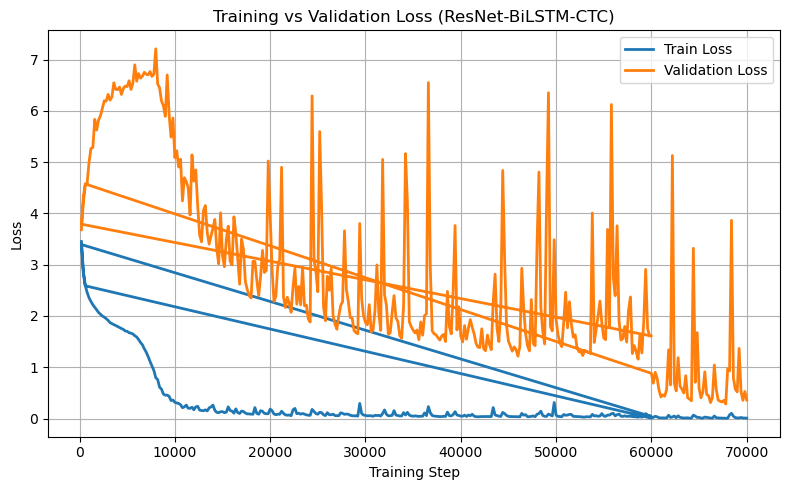

In [5]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_file = "saved_models/ne_Attn_11_17/log_train.txt"

# Read file
with open(log_file, "r", encoding="utf-8") as f:
    text = f.read()

# Extract losses using regex
pattern = r"\[(\d+)/\d+\]\s*Train loss:\s*([\d.]+),\s*Valid loss:\s*([\d.]+)"
matches = re.findall(pattern, text)

# Parse values
steps = [int(m[0]) for m in matches]
train_loss = [float(m[1]) for m in matches]
valid_loss = [float(m[2]) for m in matches]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(steps, train_loss, label="Train Loss", linewidth=2)
plt.plot(steps, valid_loss, label="Validation Loss", linewidth=2)
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (ResNet-BiLSTM-CTC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
